In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error, silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D


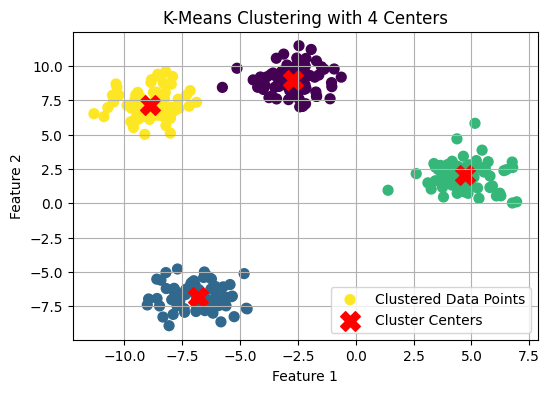

In [4]:
# 1.Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

# 1. Generate synthetic data with 4 centers
n_samples = 300
n_features = 2
n_centers = 4
random_state = 42 # for reproducibility

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, random_state=random_state)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=n_centers, random_state=random_state, n_init=10) # n_init to avoid warning
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
cluster_centers = kmeans.cluster_centers_

# 3. Visualize using a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Clustered Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
#2.Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels


from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features of the dataset

# Initialize AgglomerativeClustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict the cluster labels
predicted_labels = agg_clustering.fit_predict(X)

# Display the first 10 predicted labels
print("First 10 predicted labels:")
print(predicted_labels[:10])


First 10 predicted labels:
[1 1 1 1 1 1 1 1 1 1]


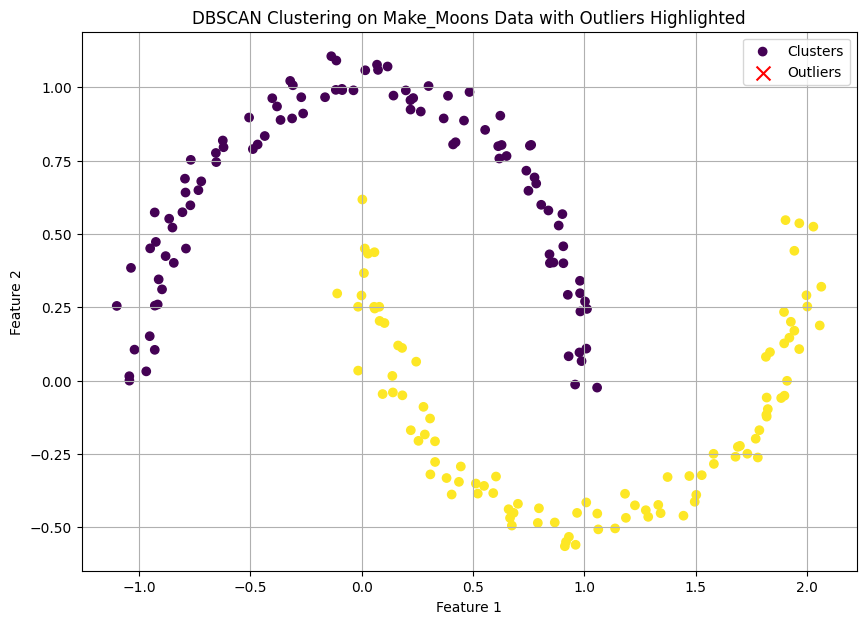

In [10]:
#3.Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot


from sklearn.datasets import make_moons


# Generate synthetic data with two moon-shaped clusters
# n_samples: number of data points
# noise: standard deviation of Gaussian noise added to the data
# random_state: seed for reproducibility
X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

# Apply DBSCAN clustering
# eps: maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize the results
plt.figure(figsize=(10, 7))

# Plot clustered points (labels >= 0)
# 'c' argument specifies the color based on cluster labels
# 'cmap' defines the colormap
plt.scatter(X[labels >= 0, 0], X[labels >= 0, 1], c=labels[labels >= 0], cmap='viridis', label='Clusters')

# Highlight outliers (labels == -1) in a distinct color, e.g., red
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='red', marker='x', s=100, label='Outliers')

plt.title('DBSCAN Clustering on Make_Moons Data with Outliers Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
#4.	Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

from sklearn.datasets import load_wine

# 1. Load the Wine dataset
wine_data = load_wine()
df_wine = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names) #

# 2. Standardize the features
scaler = StandardScaler() #
df_wine_scaled = scaler.fit_transform(df_wine)

# 3. Apply K-Means clustering
# Determine the optimal number of clusters (e.g., using the elbow method or prior knowledge)
# For this example, let's assume an optimal 'k' of 3, based on common practice with this dataset.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) #
kmeans.fit(df_wine_scaled) #

# 4. Get the cluster assignments for each data point
cluster_labels = kmeans.labels_ #

# 5. Print the size of each cluster
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
print("Size of each cluster:")
print(cluster_sizes)


Size of each cluster:
0    65
1    51
2    62
Name: count, dtype: int64


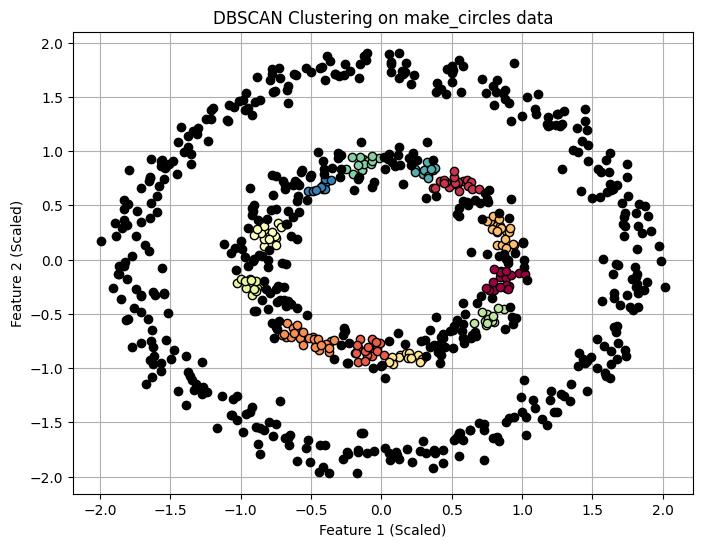

In [18]:
#5.Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

from sklearn.datasets import make_circles
import matplotlib.colors as mcolors

# 1. Generate synthetic data using make_circles
X, y = make_circles(n_samples=750, factor=0.5, noise=0.05, random_state=42)

# 2. Standardize the data (important for distance-based algorithms like DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN clustering
# Adjust eps and min_samples based on the data density and desired cluster characteristics
dbscan = DBSCAN(eps=0.1, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

# 4. Plot the results
plt.figure(figsize=(8, 6))
unique_labels = set(clusters)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:  # Noise points are represented by -1
        color = 'k'  # Black color for noise
    else:
        color = col

    class_member_mask = (clusters == k)

    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=mcolors.to_rgba(color),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering on make_circles data')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.grid(True)
plt.show()

In [22]:
#6.Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

from sklearn.datasets import load_breast_cancer


# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# 2. Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Use K-Means with 2 clusters
# n_init='auto' is recommended to prevent warnings
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

# 4. Output the cluster centroids
centroids_scaled = kmeans.cluster_centers_

# To make the centroids interpretable, inverse the scaling
centroids = scaler.inverse_transform(centroids_scaled)

# Display the centroids in a DataFrame
centroids_df = pd.DataFrame(centroids, columns=cancer.feature_names)
centroids_df.index = ['Cluster 0', 'Cluster 1']

print("Cluster Centroids (Original Scale):")
print(centroids_df)


Cluster Centroids (Original Scale):
           mean radius  mean texture  mean perimeter    mean area  \
Cluster 0    17.647672     21.407989      116.982381  1001.077778   
Cluster 1    12.376366     18.236053       79.528184   482.705789   

           mean smoothness  mean compactness  mean concavity  \
Cluster 0         0.104679          0.157046        0.178567   
Cluster 1         0.092223          0.078127        0.044152   

           mean concave points  mean symmetry  mean fractal dimension  ...  \
Cluster 0             0.094419       0.196881                0.064178  ...   
Cluster 1             0.026289       0.173343                0.062111  ...   

           worst radius  worst texture  worst perimeter   worst area  \
Cluster 0     21.436138      28.944286       143.883810  1465.268783   
Cluster 1     13.699313      24.052289        89.046289   589.778947   

           worst smoothness  worst compactness  worst concavity  \
Cluster 0          0.146686           0.4023

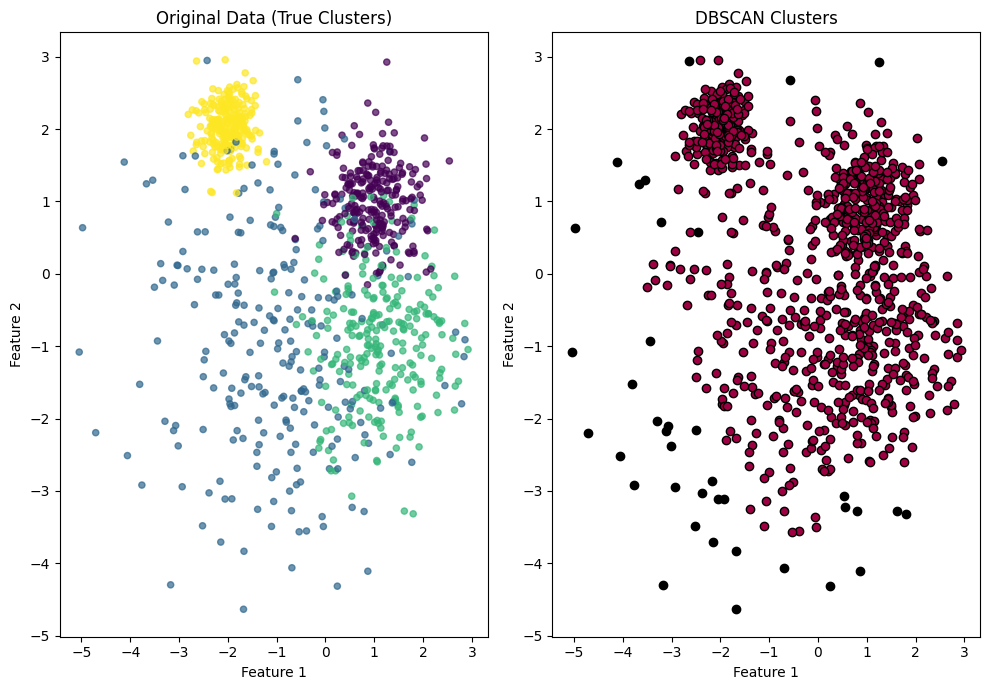

Estimated number of clusters: 1
Estimated number of noise points: 39


In [4]:
#7.Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN


from sklearn.datasets import make_blobs

# 1. Generate synthetic data with varying cluster standard deviations
n_samples = 1000
n_features = 2
centers = [[1, 1], [-1, -1], [1, -1], [-2, 2]]
cluster_stds = [0.5, 1.5, 0.8, 0.3]  # Varying standard deviations for each cluster

X, y_true = make_blobs(n_samples=n_samples, centers=centers,
                       cluster_std=cluster_stds, random_state=42)

# Scale the data for better DBSCAN performance (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Cluster the data with DBSCAN
# Adjust eps and min_samples based on the data density and desired cluster characteristics
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# 3. Visualize the results
plt.figure(figsize=(10, 7))

# Plotting the original data (true clusters)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=20, alpha=0.7)
plt.title('Original Data (True Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotting the DBSCAN clusters
plt.subplot(1, 2, 2)
# Handle noise points (-1) in DBSCAN
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print the number of estimated clusters and noise points
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


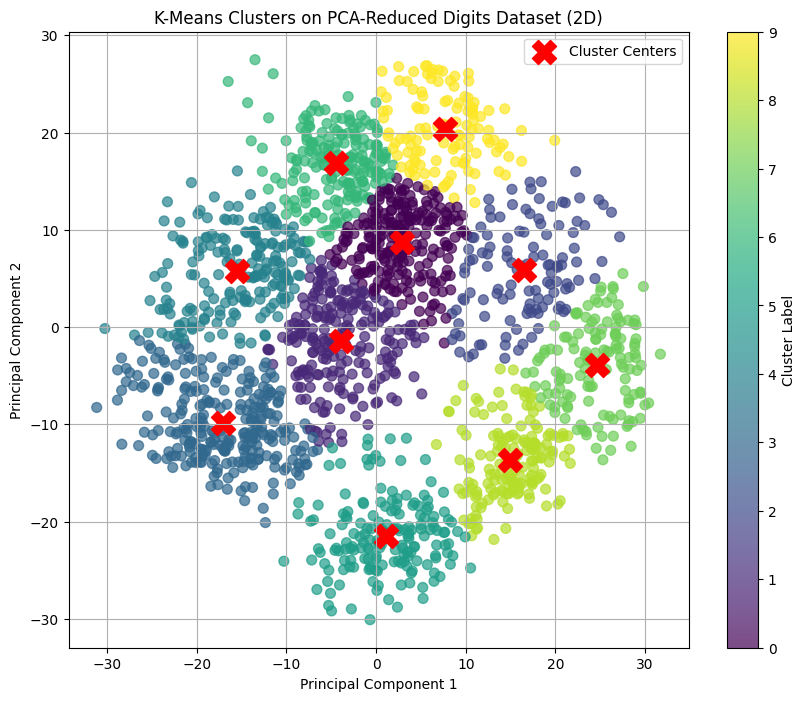

In [6]:
#8.Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means


from sklearn.datasets import load_digits

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target # True labels for comparison, though K-Means is unsupervised

# 2. Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 3. Apply K-Means clustering
# We know there are 10 digits (0-9), so we set n_clusters=10
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_reduced)

# 4. Visualize the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means Clusters on PCA-Reduced Digits Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()



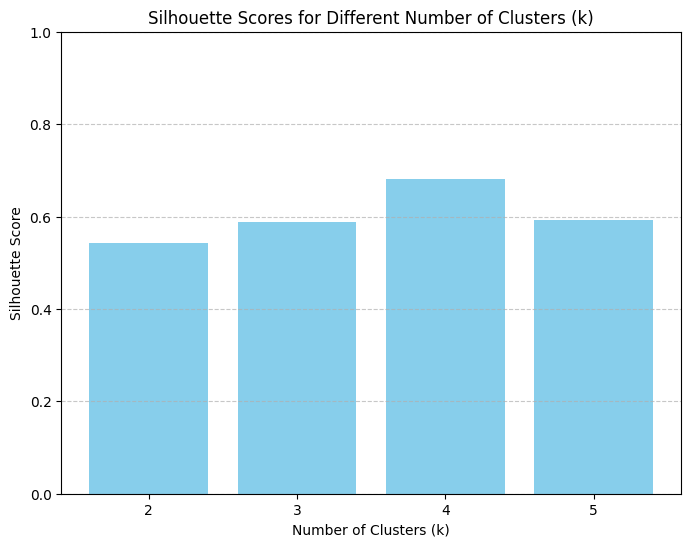

In [8]:
#9.Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart


from sklearn.datasets import make_blobs

# 1. Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Evaluate silhouette scores for k = 2 to 5
silhouette_scores = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10) # n_init for robust centroid initialization
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores[k] = score

# 3. Display as a bar chart
k_values = list(silhouette_scores.keys())
scores = list(silhouette_scores.values())

plt.figure(figsize=(8, 6))
plt.bar(k_values, scores, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters (k)')
plt.xticks(k_values)
plt.ylim(0, 1) # Silhouette scores range from -1 to 1, but often positive for well-separated clusters
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


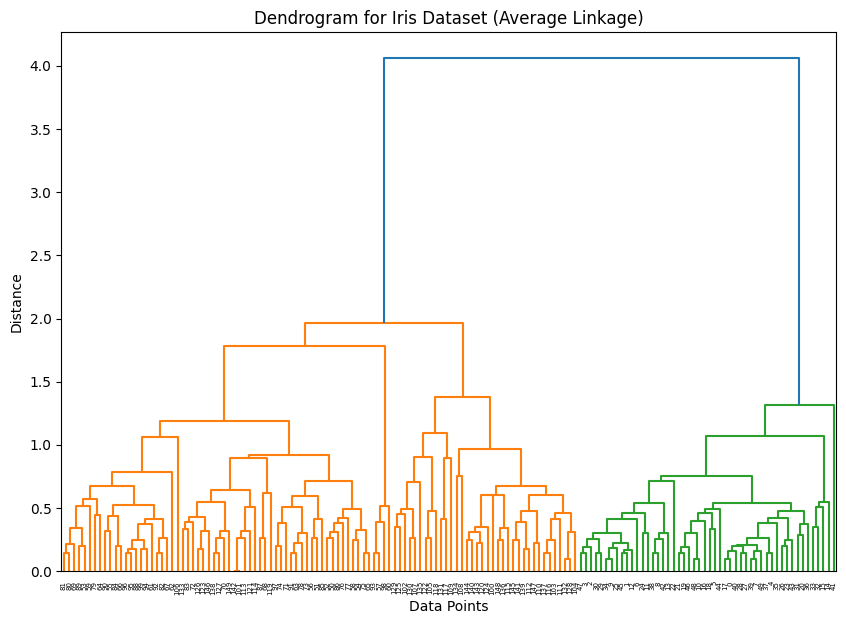

In [15]:
#10.Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage


from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

linked = linkage(X, method='average')

plt.figure(figsize=(10, 7))
dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
plt.title('Dendrogram for Iris Dataset (Average Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


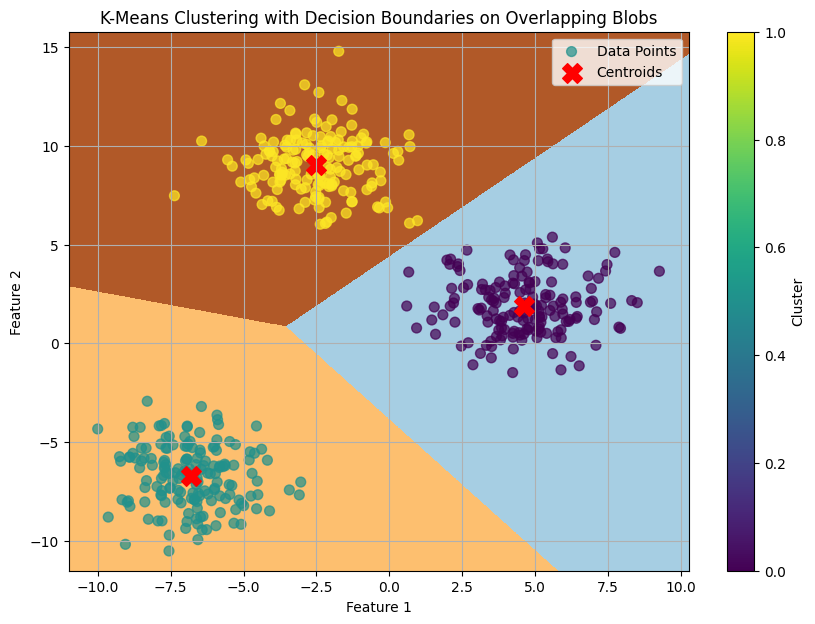

In [16]:
#11.Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries


from sklearn.datasets import make_blobs

# Generate synthetic data with overlapping clusters
X, y = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.5, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)
y_pred = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict cluster for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data, centroids, and decision boundaries
plt.figure(figsize=(10, 7))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis', alpha=0.7, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering with Decision Boundaries on Overlapping Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


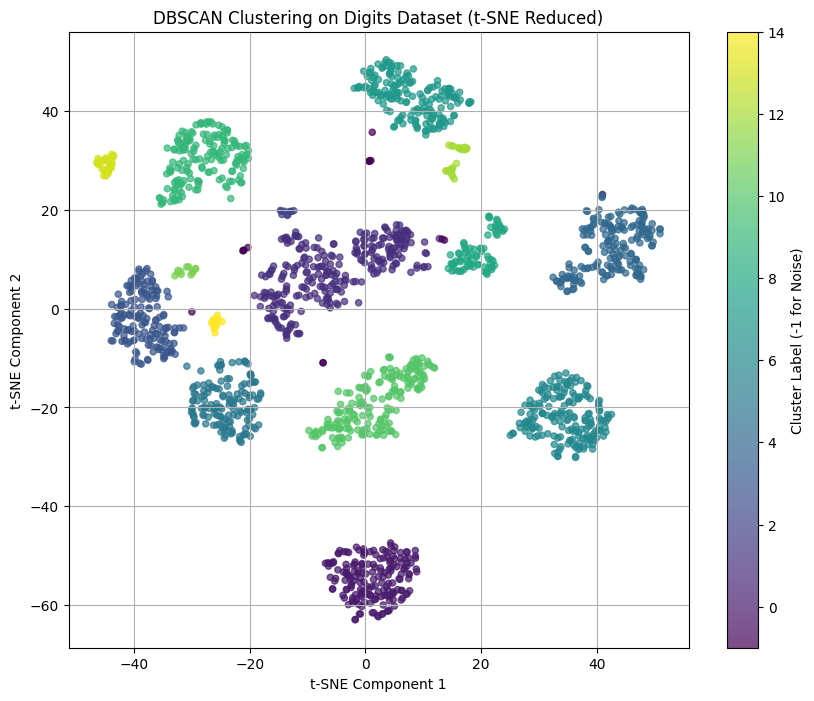

In [18]:
#12.Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

from sklearn.datasets import load_digits

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target # True labels for comparison, not used by DBSCAN

# 2. Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 3. Apply DBSCAN clustering
# These parameters might need tuning for optimal results on your specific data
dbscan = DBSCAN(eps=3, min_samples=5)
clusters = dbscan.fit_predict(X_tsne)

# 4. Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', s=20, alpha=0.7)
plt.title('DBSCAN Clustering on Digits Dataset (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Cluster Label (-1 for Noise)')
plt.grid(True)
plt.show()



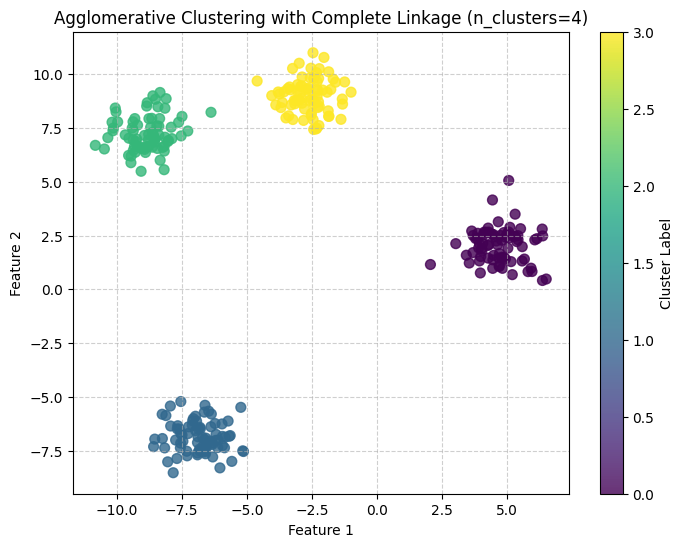

In [19]:
#13.Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result


from sklearn.datasets import make_blobs

# 1. Generate synthetic data
n_samples = 300
n_features = 2
n_centers = 4
cluster_std = 0.8
random_state = 42 # for reproducibility

X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=cluster_std,
                       random_state=random_state)

# 2. Apply Agglomerative Clustering with complete linkage
n_clusters_to_find = n_centers # Assuming we want to find the original number of clusters
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters_to_find, linkage='complete')
labels = agg_cluster.fit_predict(X)

# 3. Plot the result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.title(f'Agglomerative Clustering with Complete Linkage (n_clusters={n_clusters_to_find})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


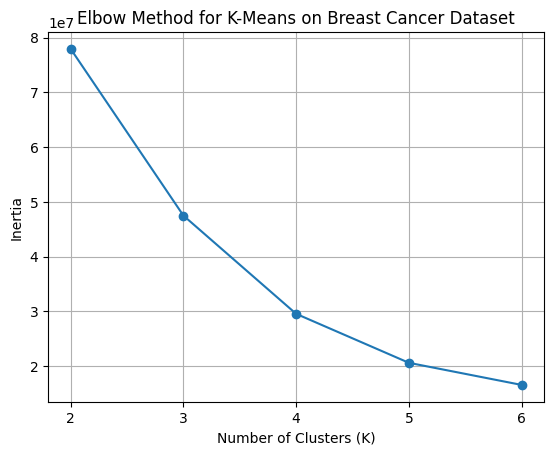

In [20]:
#14.Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot


from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data

inertia_values = []
for k in range(2, 7): # Iterating from K=2 to K=6
    kmeans = KMeans(n_clusters=k, random_state=42) # Set random_state for reproducibility
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(2, 7), inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means on Breast Cancer Dataset")
plt.xticks(range(2, 7)) # Ensure K values are clearly marked
plt.grid(True)
plt.show()


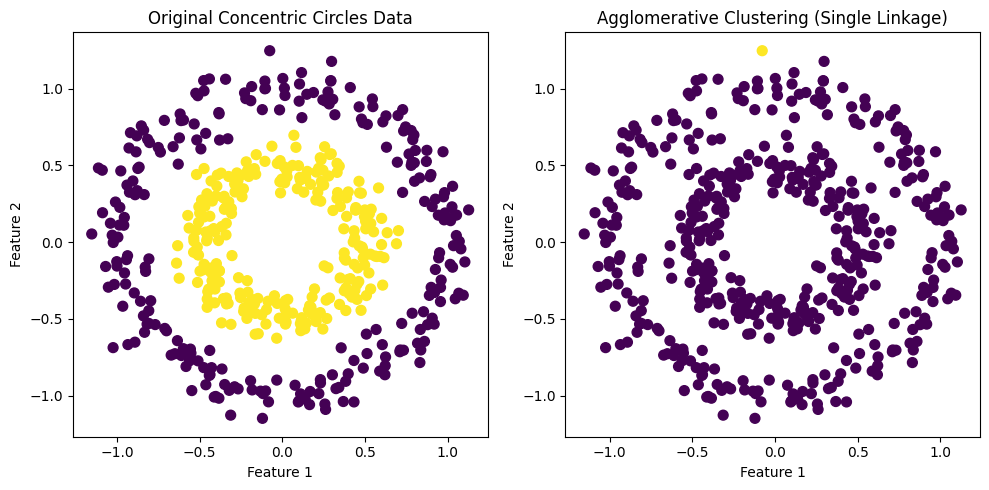

In [21]:
#15.Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage


from sklearn.datasets import make_circles

# 1. Generate synthetic concentric circles dataset
# n_samples: Total number of points to generate
# noise: Standard deviation of Gaussian noise
# factor: Scale factor between the inner and outer circle
X, y_true = make_circles(n_samples=500, noise=0.08, factor=0.5, random_state=42)

# 2. Cluster the data using Agglomerative Clustering with single linkage
# n_clusters: The number of clusters to find
# linkage: The linkage criterion ('single', 'complete', 'average', 'ward')
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg_cluster.fit_predict(X)

# 3. Visualize the results
plt.figure(figsize=(10, 5))

# Subplot 1: Original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50)
plt.title('Original Concentric Circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Subplot 2: Agglomerative Clustering with single linkage results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering (Single Linkage)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [24]:
#16.Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)




# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
# Choose appropriate eps and min_samples values for your dataset.
# These values are often determined through experimentation or analysis (e.g., k-distance graph).
# For demonstration, example values are used.
dbscan = DBSCAN(eps=0.7, min_samples=10) # Example values
clusters = dbscan.fit_predict(X_scaled)

# Count the number of clusters (excluding noise)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

print(f"Number of clusters (excluding noise): {n_clusters}")


Number of clusters (excluding noise): 0


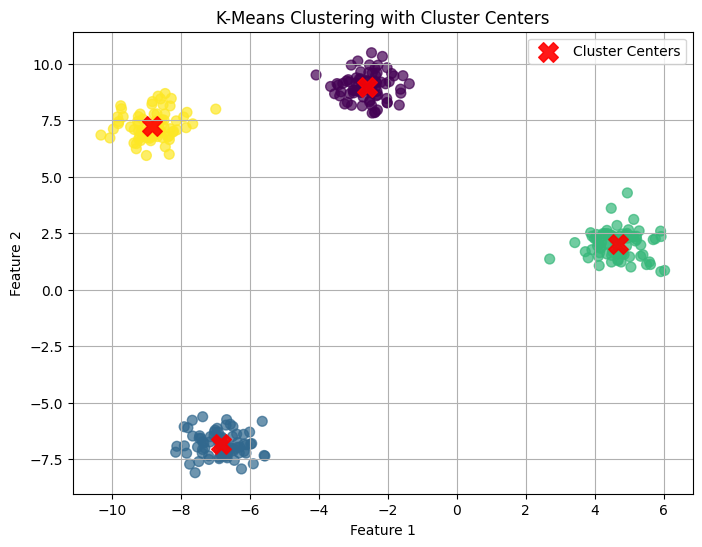

In [25]:
#17.Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

from sklearn.datasets import make_blobs


# 1. Generate synthetic data
# n_samples: total number of points
# centers: number of distinct clusters
# cluster_std: standard deviation of the clusters
# random_state: ensures reproducibility
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# 2. Apply KMeans clustering
# n_clusters: the number of clusters to form
# random_state: ensures reproducibility for centroid initialization
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Get the cluster centers
centers = kmeans.cluster_centers_

# 3. Plot the data points and cluster centers
plt.figure(figsize=(8, 6))

# Plot data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X', label='Cluster Centers')

plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
#18.Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise



from sklearn.datasets import load_iris


# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply DBSCAN clustering
# You may need to tune 'eps' and 'min_samples' based on your data and desired cluster characteristics.
# For the Iris dataset, common values might be: eps=0.5, min_samples=5
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Count the number of samples identified as noise
# In DBSCAN, noise samples are assigned a label of -1
noise_samples = np.sum(labels == -1)

# Print the result
print(f"Number of samples identified as noise: {noise_samples}")


Number of samples identified as noise: 17


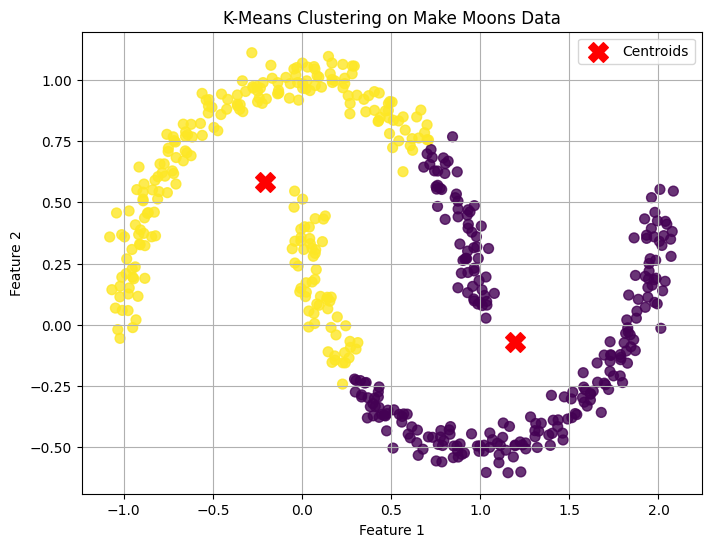

In [27]:
#19.Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result


from sklearn.datasets import make_moons

# 1. Generate synthetic non-linearly separable data using make_moons
n_samples = 500
noise = 0.05
X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)

# 2. Apply K-Means clustering
# K-Means struggles with non-linearly separable data like make_moons
# as it tries to find spherical clusters.
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 3. Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering on Make Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


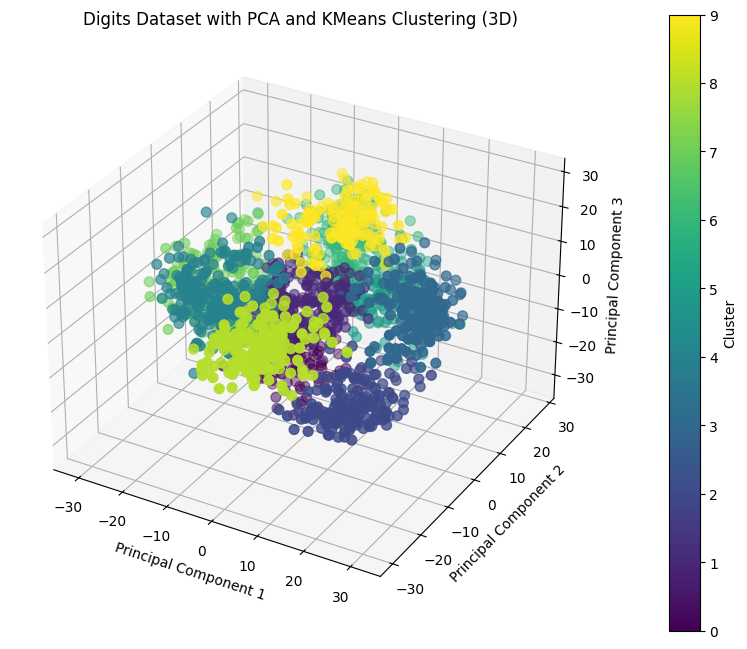

In [31]:
#20.Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.


from sklearn.datasets import load_digits

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# 2. Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3. Use KMeans clustering
# Assuming 10 clusters as there are 10 digits (0-9)
kmeans = KMeans(n_clusters=10, random_state=1, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# 4. Visualize with a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Digits Dataset with PCA and KMeans Clustering (3D)')

# Add a color bar for cluster identification
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster')

plt.show()


Silhouette Score for K-Means with 5 clusters: 0.6586


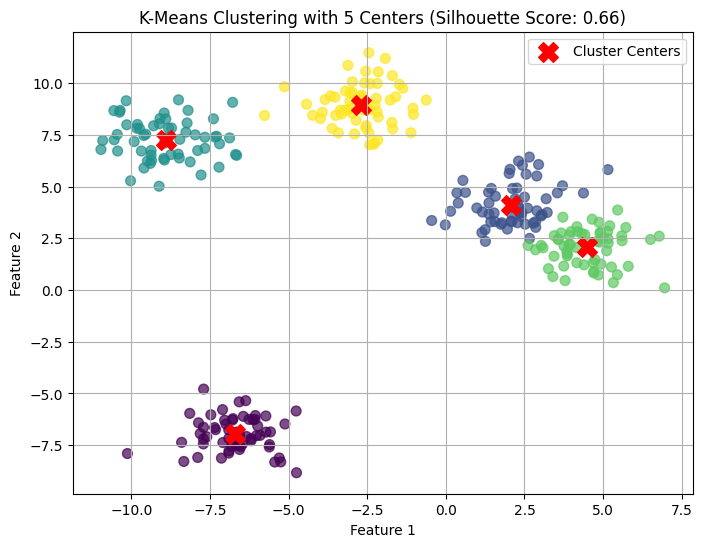

In [30]:
#21.Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering



from sklearn.datasets import make_blobs

# 1. Generate synthetic blobs with 5 centers
n_samples = 300
n_features = 2
n_centers = 5
X, y_true = make_blobs(n_samples=n_samples, centers=n_centers, n_features=n_features, random_state=42)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=n_centers, random_state=1, n_init=10) # n_init to run KMeans multiple times with different centroid seeds
kmeans.fit(X)
labels = kmeans.labels_

# 3. Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)

print(f"Silhouette Score for K-Means with {n_centers} clusters: {silhouette_avg:.4f}")

# Optional: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Cluster Centers')
plt.title(f'K-Means Clustering with {n_centers} Centers (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


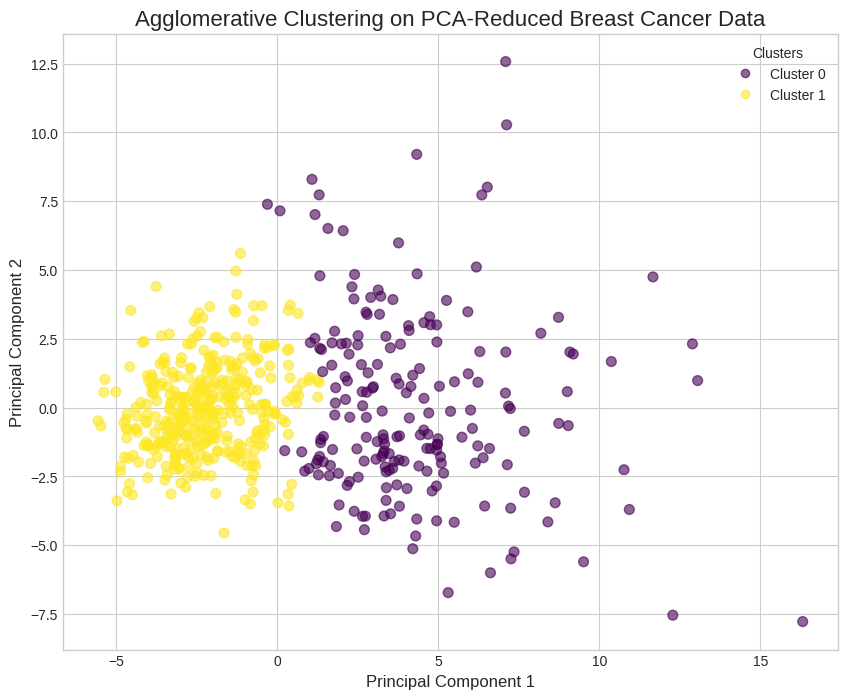

In [33]:
#22.Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D


from sklearn.datasets import load_breast_cancer

# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer(as_frame=True)
X = cancer.data
y = cancer.target

# 2. Standardize the data
# PCA is sensitive to the scale of the data, so it is best to standardize it first.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce dimensionality using PCA
# We will reduce the 30 features down to the two principal components.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
# Initialize the model with the desired number of clusters (two in this case: malignant and benign).
# The 'ward' linkage minimizes the variance of the clusters being merged.
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = agg_clustering.fit_predict(X_pca)

# 5. Visualize the results
# Create a DataFrame for easy plotting with Matplotlib.
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

# Plot each cluster separately to assign a different color and label
scatter = ax.scatter(
    df_pca['PC1'],
    df_pca['PC2'],
    c=df_pca['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.6,
)

# Add titles and labels for clarity
ax.set_title(
    'Agglomerative Clustering on PCA-Reduced Breast Cancer Data', fontsize=16
)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)

# Create a legend based on the cluster labels
legend_labels = ['Cluster 0', 'Cluster 1']
handles, _ = scatter.legend_elements()
ax.legend(handles, legend_labels, title='Clusters')
plt.show()


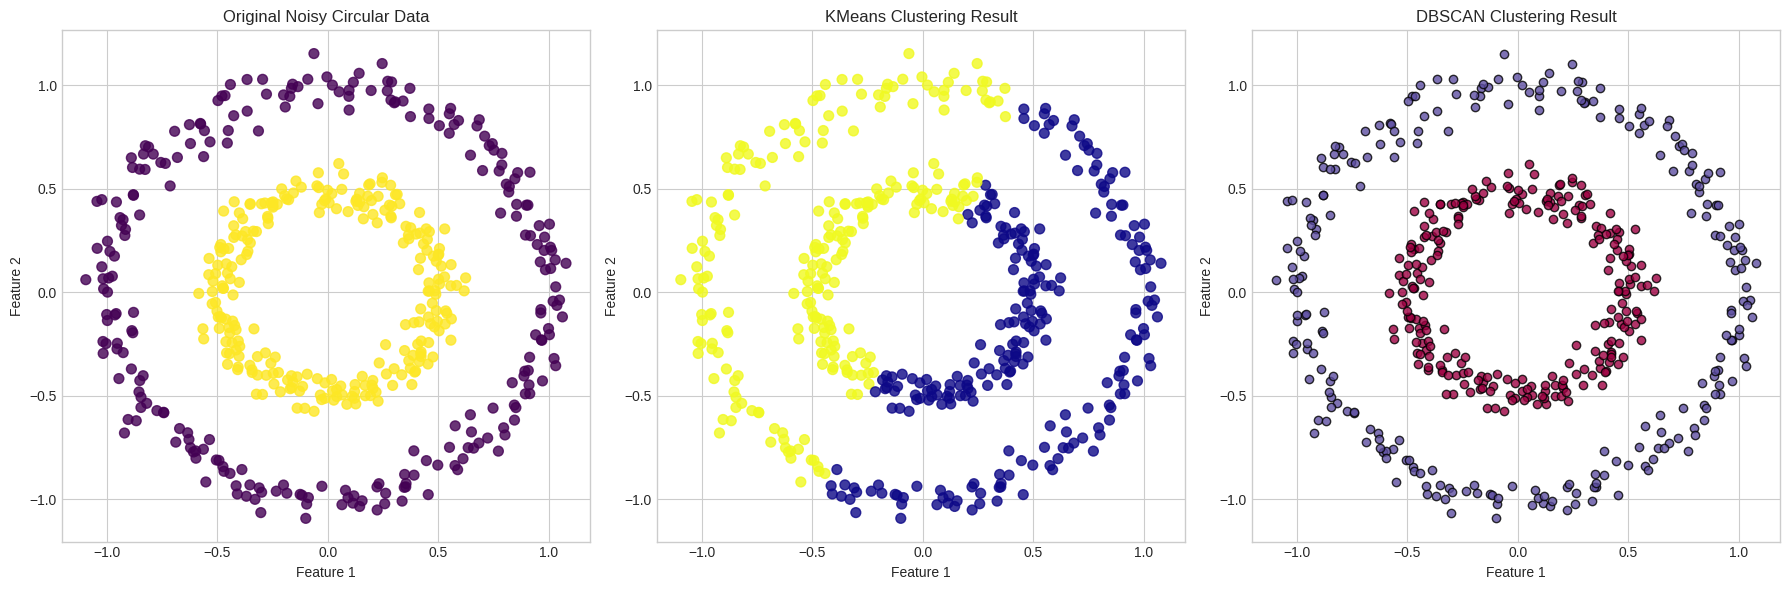

In [35]:
#23.Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side


from sklearn.datasets import make_circles


# 1. Generate noisy circular data
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=1, n_init='auto')
kmeans_labels = kmeans.fit_predict(X)

# 3. Apply DBSCAN clustering
# Adjust eps and min_samples as needed for your specific noise level
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# 4. Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original data
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
axes[0].set_title('Original Noisy Circular Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# KMeans clustering result
axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='plasma', s=50, alpha=0.8)
axes[1].set_title('KMeans Clustering Result')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# DBSCAN clustering result
# -1 in DBSCAN labels represents noise points
unique_labels = set(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (dbscan_labels == k)

    xy = X[class_member_mask]
    axes[2].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6, alpha=0.8)

axes[2].set_title('DBSCAN Clustering Result')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


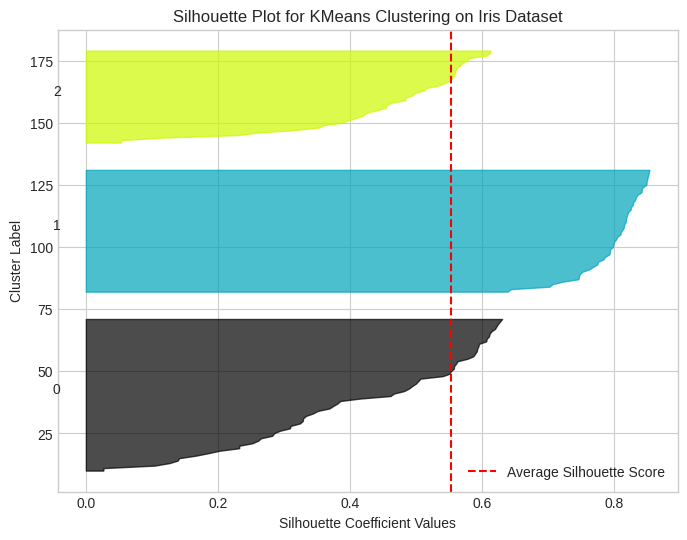

In [38]:
#24.Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering


from sklearn.datasets import load_iris

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data

# 2. Perform K-Means Clustering
# Assuming 3 clusters for the Iris dataset
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# 3. Calculate Silhouette Coefficients for each sample
silhouette_per_sample = silhouette_samples(X, cluster_labels)

# 4. Plot the Silhouette Coefficients
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10  # Starting point for plotting each silhouette slice

for i in range(3):  # Iterate through each cluster (0, 1, 2)
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = silhouette_per_sample[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)  # Assign a color for each cluster
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("Silhouette Plot for KMeans Clustering on Iris Dataset")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.axvline(x=silhouette_per_sample.mean(), color="red", linestyle="--", label="Average Silhouette Score")
ax.legend()
plt.show()


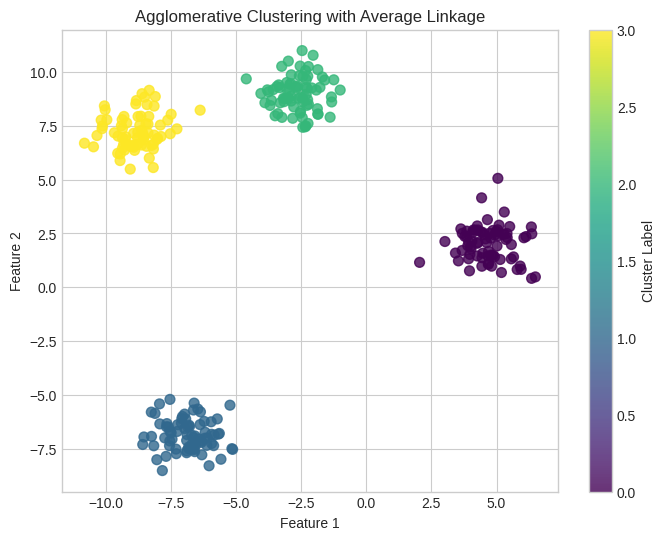

In [40]:
#25.Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters


from sklearn.datasets import make_blobs

# 1. Generate synthetic data
# Set a random seed for reproducibility
np.random.seed(42)
# Generate 300 samples with 4 distinct centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# 2. Apply Agglomerative Clustering with 'average' linkage
# Initialize AgglomerativeClustering with 4 clusters and 'average' linkage
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
# Fit the model and predict cluster labels
labels = agg_clustering.fit_predict(X)

# 3. Visualize the clusters
plt.figure(figsize=(8, 6))
# Scatter plot the data points, coloring them by their assigned cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.title('Agglomerative Clustering with Average Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


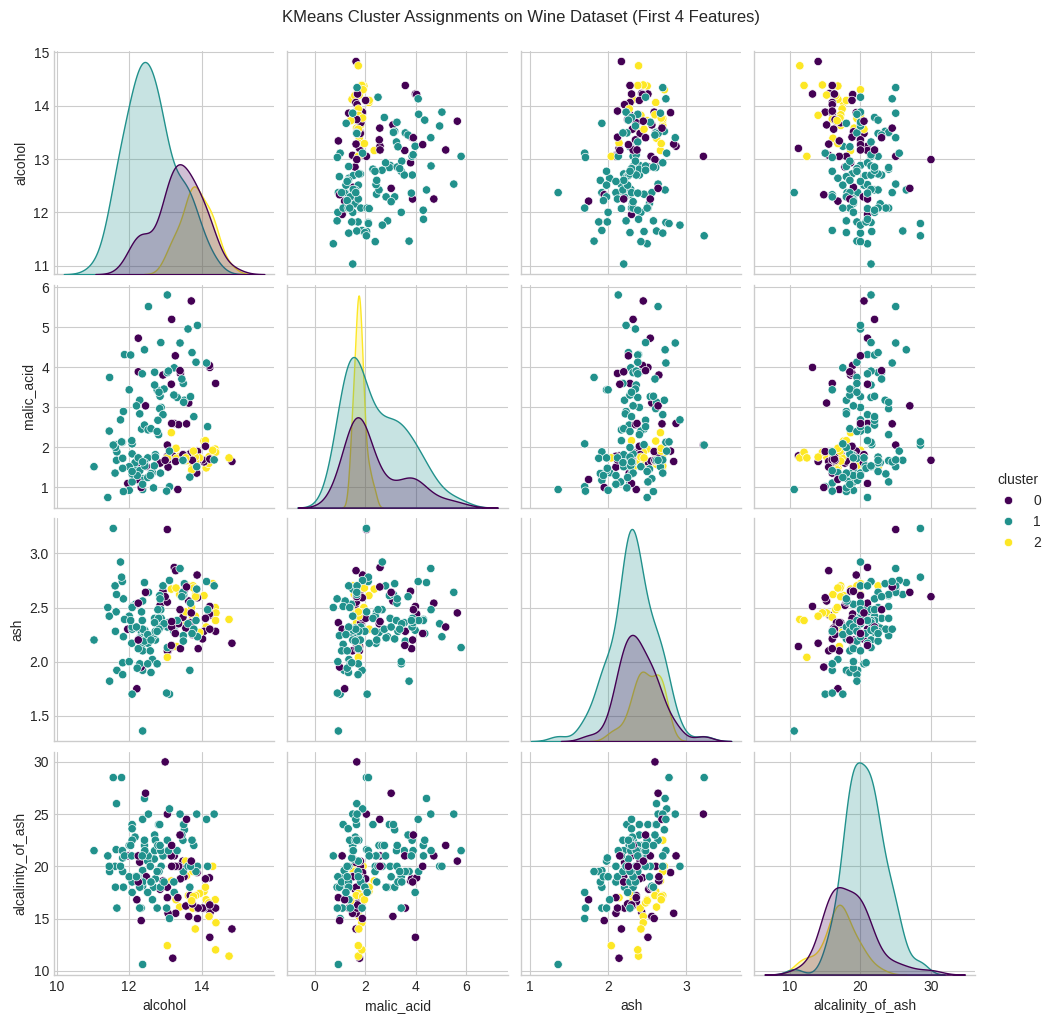

In [42]:
#26.Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)


from sklearn.datasets import load_wine

# 1. Load the Wine dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

# 2. Apply KMeans clustering (assuming 3 clusters as per Wine dataset's original classes)
kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto') # n_init='auto' to suppress warning
df['cluster'] = kmeans.fit_predict(df)

# 3. Visualize the cluster assignments in a seaborn pairplot (first 4 features)
sns.pairplot(df, vars=df.columns[:4], hue='cluster', palette='viridis')
plt.suptitle('KMeans Cluster Assignments on Wine Dataset (First 4 Features)', y=1.02)
plt.show()



In [43]:
#27.Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count


from sklearn.datasets import make_blobs


# Generate synthetic data with make_blobs, introducing some noise
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=1)

# Add some additional random noise points to the dataset
noise_points = np.random.rand(50, 2) * 10 - 5  # Generate 50 random points
X = np.vstack([X, noise_points])

# Apply DBSCAN clustering
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
db = DBSCAN(eps=0.7, min_samples=5).fit(X)
labels = db.labels_

# Count the number of clusters and noise points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise label (-1)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


Estimated number of clusters: 3
Estimated number of noise points: 54


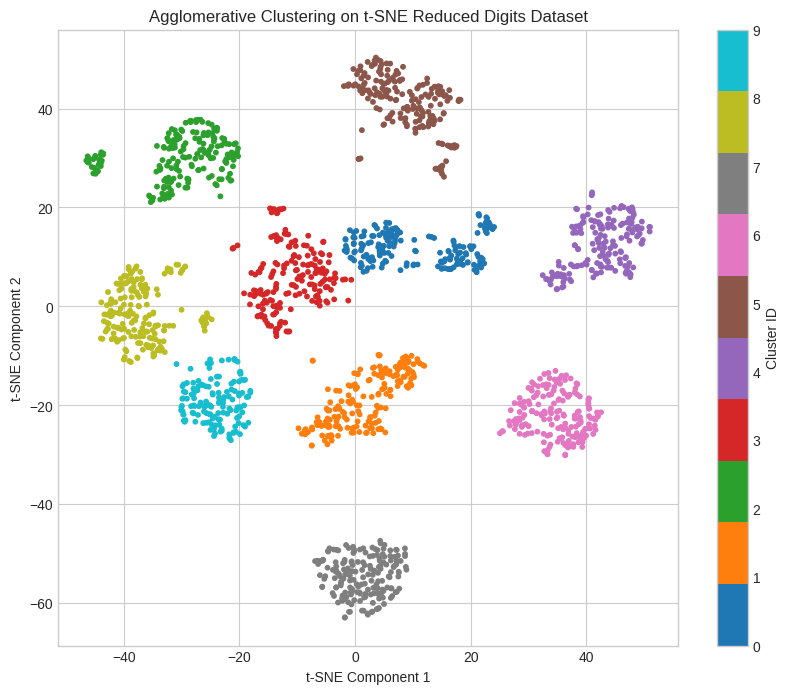

In [44]:
#28.Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

# 1. Load the Digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 2. Reduce dimensions using t-SNE
# It's often recommended to reduce dimensions to 2 for visualization.
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 3. Apply Agglomerative Clustering
# We'll assume 10 clusters, corresponding to the 10 digits.
n_clusters = 10
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agglomerative.fit_predict(X_tsne)

# 4. Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='tab10', s=10)
plt.title('Agglomerative Clustering on t-SNE Reduced Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()
